# 使用範例
使用 keras-Like_NN 套件來近似 sine function。

## 導入相關套件及 My_Keras_Like 的內容

In [1]:
%pylab inline
from mydl import Dense, Sequential, Dropout, SquareError, Activation
from mydl_operator import Sine, Cosine
import numpy as np

Populating the interactive namespace from numpy and matplotlib


## 造 sine function 的數據

In [2]:
xlst = np.linspace(np.pi, 2*np.pi, 20)
ylst = np.sin(xlst)

## 建模型的方式模仿 Keras

In [3]:
N = 3

model = Sequential()
model.add(Dense(N, 1))
model.add(Activation('sigmoid'))
model.add(Dense(N, N))
model.add(Activation('sigmoid'))
model.add(Dense(1, N))
model.compile(SquareError())

## 訓練的方式稍微不一樣，前兩個變數可以自由餵入 batch，第三個變數為 learning rate

In [10]:
for _ in xrange(10):
        model.fit(xlst, ylst, 1)

Loss: [[ 0.96224509]] in 20 samples.
Loss: [[ 0.96238927]] in 20 samples.
Loss: [[ 0.96253642]] in 20 samples.
Loss: [[ 0.96268577]] in 20 samples.
Loss: [[ 0.96283682]] in 20 samples.
Loss: [[ 0.96298921]] in 20 samples.
Loss: [[ 0.96314266]] in 20 samples.
Loss: [[ 0.96329698]] in 20 samples.
Loss: [[ 0.96345202]] in 20 samples.
Loss: [[ 0.96360765]] in 20 samples.


一開始 learning rate 大一點比較好，但不要大到 divergence 的情形。

In [11]:
for _ in xrange(1000):
    for __ in xrange(len(ylst)):
        model.fit_single(xlst[__], ylst[__], .001)
    
for _ in xrange(200):
        model.fit(xlst, ylst, .001)

loss: [[ 0.19652085]]
loss: [[ 0.076808]]
loss: [[ 0.01334302]]
loss: [[ 0.00138582]]
loss: [[ 0.03035837]]
loss: [[ 0.08671358]]
loss: [[ 0.1557262]]
loss: [[ 0.22271071]]
loss: [[ 0.27481959]]
loss: [[ 0.30260002]]
loss: [[ 0.30113545]]
loss: [[ 0.27064471]]
loss: [[ 0.21647146]]
loss: [[ 0.14846441]]
loss: [[ 0.07981626]]
loss: [[ 0.02548918]]
loss: [[ 0.0004013]]
loss: [[ 0.01757554]]
loss: [[ 0.0848612]]
loss: [[ 0.20660423]]
loss: [[ 0.20632496]]
loss: [[ 0.08297526]]
loss: [[ 0.01598035]]
loss: [[ 0.0006935]]
loss: [[ 0.02668143]]
loss: [[ 0.08041717]]
loss: [[ 0.14724721]]
loss: [[ 0.21254613]]
loss: [[ 0.26351314]]
loss: [[ 0.29072752]]
loss: [[ 0.28928922]]
loss: [[ 0.25941752]]
loss: [[ 0.20644039]]
loss: [[ 0.14017521]]
loss: [[ 0.07376841]]
loss: [[ 0.02212227]]
loss: [[  8.30151878e-05]]
loss: [[ 0.02059157]]
loss: [[ 0.09134302]]
loss: [[ 0.21664725]]
loss: [[ 0.21639846]]
loss: [[ 0.08940023]]
loss: [[ 0.01886428]]
loss: [[ 0.00023746]]
loss: [[ 0.02323197]]
loss: [[ 0.

## 看看訓練的結果，恩...很爛，sine不是這麼好訓練的樣子。

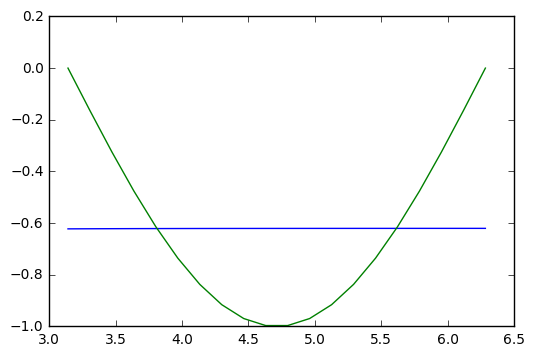

In [12]:
y = np.zeros(ylst.shape)
for i, x in enumerate(xlst):
    y[i] = model.evaluate_single(x)
    
plot(xlst, y)
plot(xlst, ylst)

In [11]:
model.evaluate_single(2)

array([[-0.36845111]])

In [14]:
n0 = model.nodes[0]
np.sin(n0.forward(n0.prev_in))

array([[-0.36845111]])

In [28]:
model.nodes[0].bias

array([[-0.1040885]])

In [29]:
6.28318531 * 0.10255398 + 0.1040885

0.7484541606180339

In [44]:
stepsize = .01
W = -0.1086948
dW = -6.15409617

bias = -0.13114487
dbias = -0.97945483

W -= (stepsize/np.linalg.norm(dW)) * dW
bias -= (stepsize/np.linalg.norm(dbias)) * dbias

In [123]:
np.random.rand() * 0.1

0.032090153709500635

In [45]:
bias

-0.12114487